## EDA And Feature Engineering Of Google Play Store Dataset

1) Data Collection.
2) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.

The data consists of 20 column and 10841 rows.

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [250]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [251]:
df.shape

(10841, 13)

In [252]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  str    
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.1 MB


In [253]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [254]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has missing values

In [255]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

In [256]:
df['Reviews'].unique()

<StringArray>
[   '159',    '967',  '87510', '215644',    '167',    '178',  '36815',
  '13791',    '121',  '13880',
 ...
   '2036',  '56496', '376223',    '785',   '5775',    '885',  '88486',
    '603',   '1195', '398307']
Length: 6002, dtype: str

In [257]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [258]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [259]:
df_copy=df.copy()

In [260]:
df_copy=df_copy.drop(df_copy.index[10472])

In [261]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [262]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  str    
 5   Installs        10840 non-null  str    
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), int64(1), str(11)
memory usage: 1.2 MB


In [263]:
df_copy['Size'].unique()

<StringArray>
[  '19M',   '14M',  '8.7M',   '25M',  '2.8M',  '5.6M',   '29M',   '33M',
  '3.1M',   '28M',
 ...
  '467k',  '157k',   '44k',  '676k',   '67k',  '552k',  '885k', '1020k',
  '582k',  '619k']
Length: 461, dtype: str

In [264]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [265]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [266]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [267]:
df_copy['Installs'].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0']
Length: 21, dtype: str

In [268]:
df_copy['Price'].unique()

<StringArray>
[      '0',   '$4.99',   '$3.99',   '$6.99',   '$1.49',   '$2.99',   '$7.99',
   '$5.99',   '$3.49',   '$1.99',   '$9.99',   '$7.49',   '$0.99',   '$9.00',
   '$5.49',  '$10.00',  '$24.99',  '$11.99',  '$79.99',  '$16.99',  '$14.99',
   '$1.00',  '$29.99',  '$12.99',   '$2.49',  '$10.99',   '$1.50',  '$19.99',
  '$15.99',  '$33.99',  '$74.99',  '$39.99',   '$3.95',   '$4.49',   '$1.70',
   '$8.99',   '$2.00',   '$3.88',  '$25.99', '$399.99',  '$17.99', '$400.00',
   '$3.02',   '$1.76',   '$4.84',   '$4.77',   '$1.61',   '$2.50',   '$1.59',
   '$6.49',   '$1.29',   '$5.00',  '$13.99', '$299.99', '$379.99',  '$37.99',
  '$18.99', '$389.99',  '$19.90',   '$8.49',   '$1.75',  '$14.00',   '$4.85',
  '$46.99', '$109.99', '$154.99',   '$3.08',   '$2.59',   '$4.80',   '$1.96',
  '$19.40',   '$3.90',   '$4.59',  '$15.46',   '$3.04',   '$4.29',   '$2.60',
   '$3.28',   '$4.60',  '$28.99',   '$2.95',   '$2.90',   '$1.97', '$200.00',
  '$89.99',   '$2.56',  '$30.99',   '$3.61', '$394

In [269]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [270]:
df_copy['Price'].unique()

<StringArray>
[     '0',   '4.99',   '3.99',   '6.99',   '1.49',   '2.99',   '7.99',
   '5.99',   '3.49',   '1.99',   '9.99',   '7.49',   '0.99',   '9.00',
   '5.49',  '10.00',  '24.99',  '11.99',  '79.99',  '16.99',  '14.99',
   '1.00',  '29.99',  '12.99',   '2.49',  '10.99',   '1.50',  '19.99',
  '15.99',  '33.99',  '74.99',  '39.99',   '3.95',   '4.49',   '1.70',
   '8.99',   '2.00',   '3.88',  '25.99', '399.99',  '17.99', '400.00',
   '3.02',   '1.76',   '4.84',   '4.77',   '1.61',   '2.50',   '1.59',
   '6.49',   '1.29',   '5.00',  '13.99', '299.99', '379.99',  '37.99',
  '18.99', '389.99',  '19.90',   '8.49',   '1.75',  '14.00',   '4.85',
  '46.99', '109.99', '154.99',   '3.08',   '2.59',   '4.80',   '1.96',
  '19.40',   '3.90',   '4.59',  '15.46',   '3.04',   '4.29',   '2.60',
   '3.28',   '4.60',  '28.99',   '2.95',   '2.90',   '1.97', '200.00',
  '89.99',   '2.56',  '30.99',   '3.61', '394.99',   '1.26',   '1.20',
   '1.04']
Length: 92, dtype: str

In [271]:
df_copy['Installs'].unique()

<StringArray>
[     '10000',     '500000',    '5000000',   '50000000',     '100000',
      '50000',    '1000000',   '10000000',       '5000',  '100000000',
 '1000000000',       '1000',  '500000000',         '50',        '100',
        '500',         '10',          '1',          '5',          '0']
Length: 20, dtype: str

In [272]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [273]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(3), int64(2), str(8)
memory usage: 1.2 MB


In [274]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

<StringArray>
[   'January 7, 2018',   'January 15, 2018',     'August 1, 2018',
       'June 8, 2018',      'June 20, 2018',     'March 26, 2017',
     'April 26, 2018',      'June 14, 2018', 'September 20, 2017',
       'July 3, 2018',
 ...
  'November 23, 2015',      'June 17, 2012',  'February 27, 2015',
  'December 18, 2013',   'February 6, 2012',  'November 25, 2014',
       'May 19, 2016',   'January 20, 2014',  'February 16, 2014',
     'March 23, 2014']
Length: 1377, dtype: str

In [275]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [276]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  str           
 1   Category        10840 non-null  str           
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  str           
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10840 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10832 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year            10

In [277]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [278]:
df_copy.to_csv('google_cleaned.csv')

## EDA


In [279]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [280]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observation
The dataset has duplicate records

In [281]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [282]:
df_copy.shape

(9659, 16)

## Explore Data

In [283]:
numeric_features = df_copy.select_dtypes(include=[np.number, 'datetime']).columns.tolist()
categorical_features = df_copy.select_dtypes(include=['object']).columns.tolist()

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [284]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
Pixel Draw - Number Art Coloring Book                 0.010353
                                                        ...   
Sya9a Maroc - FR                                      0.010353
Fr. Mike Schmitz Audio Teachings                      0.010353
Parkinson Exercices FR                                0.010353
The SCP Foundation DB fr nn5n                         0.010353
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY         

In [285]:
numeric_features = df_copy.select_dtypes(include=['int64', 'int32', 'float64']).columns


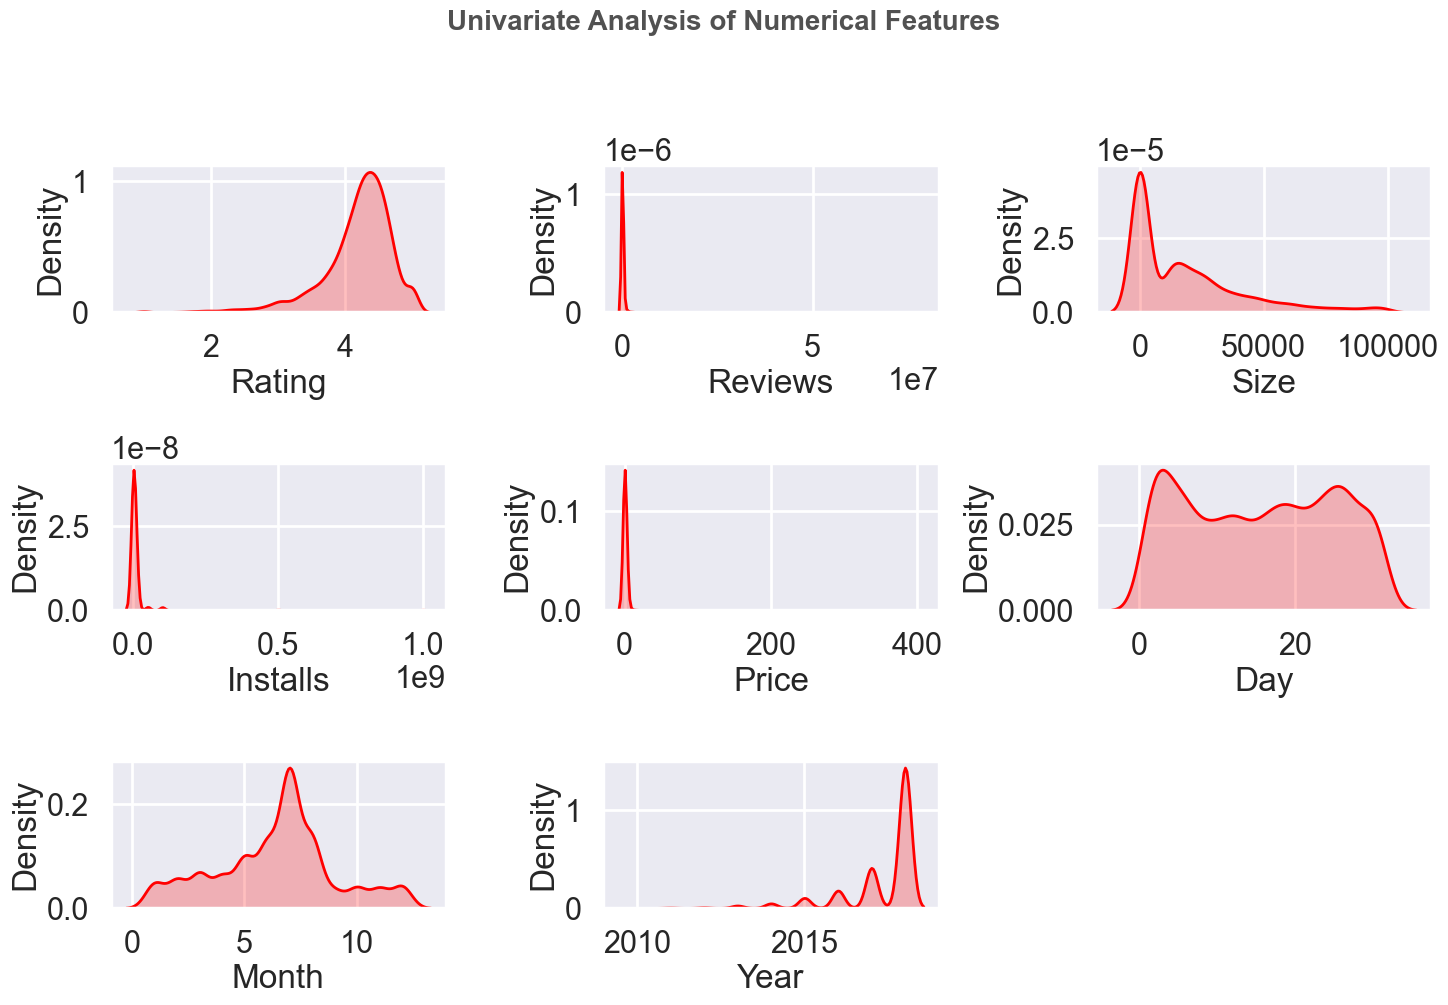

In [286]:
plt.figure(figsize=(15, 15))
plt.suptitle(
    'Univariate Analysis of Numerical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.02
)

for i in range(len(numeric_features)):
    plt.subplot(5, 3, i + 1)
    
    sns.kdeplot(
        x=df_copy[numeric_features[i]].dropna(),
        fill=True,          # replaces shade=True
        color='r'
    )
    
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()


## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

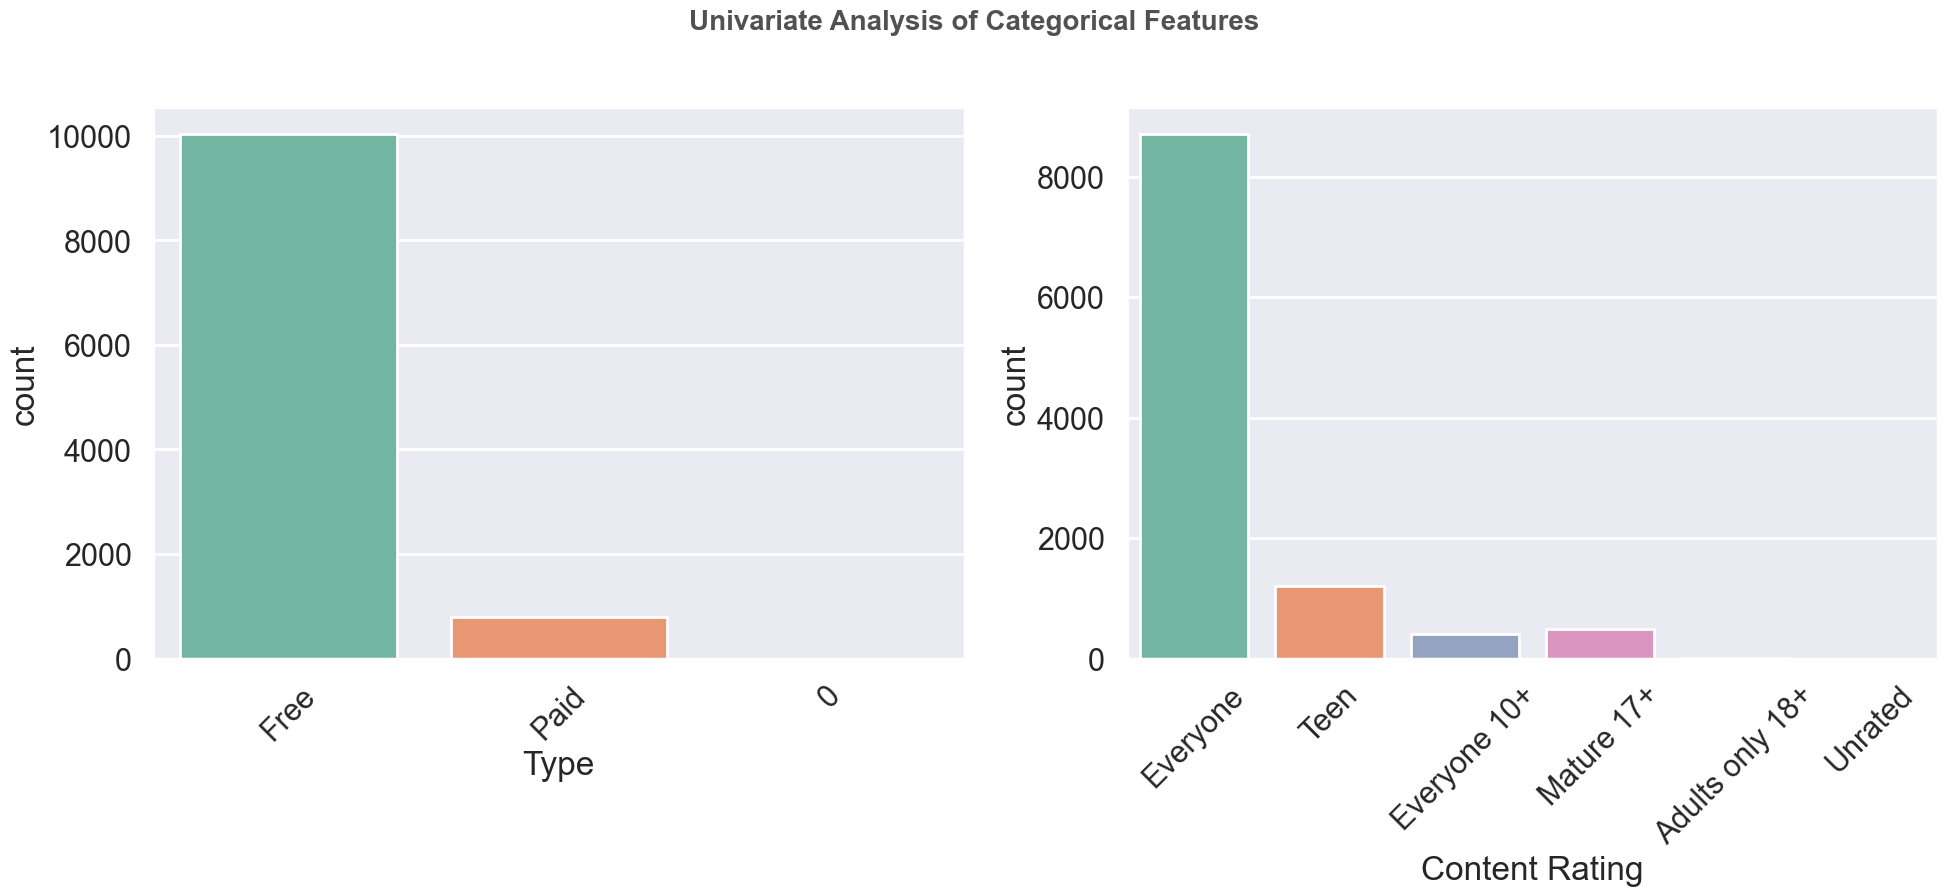

In [287]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [288]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


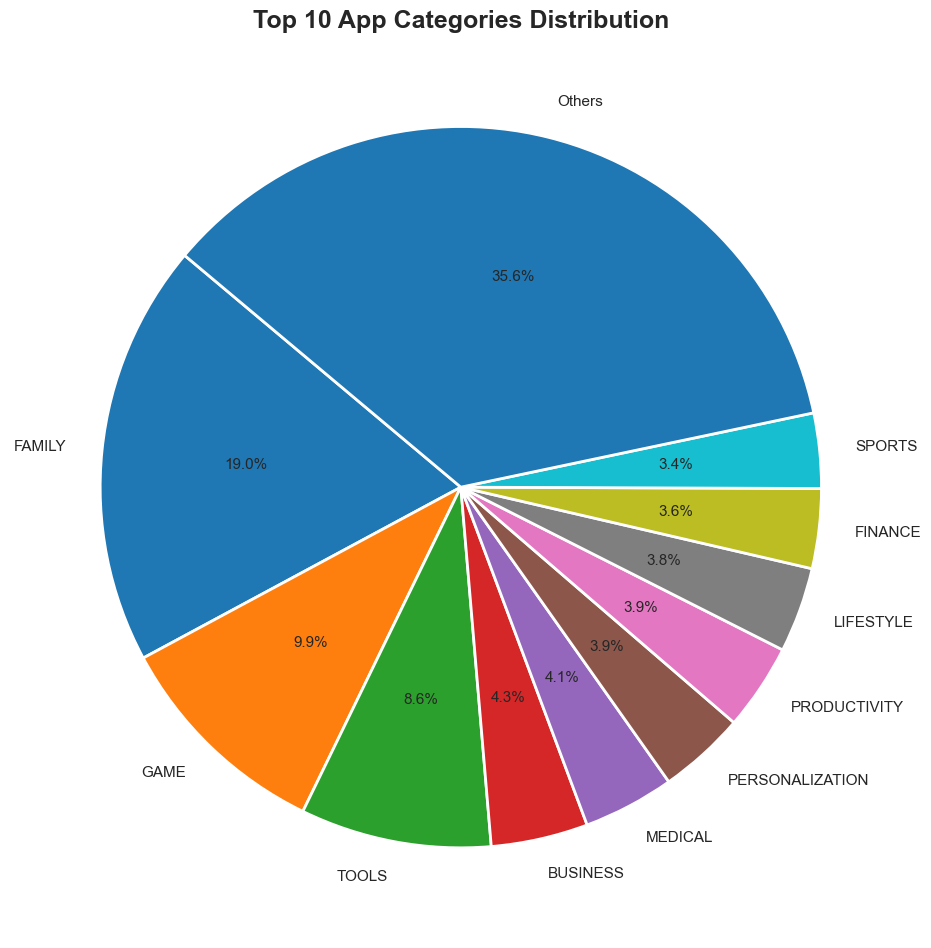

In [289]:

category_counts = df_copy['Category'].value_counts()


top_categories = category_counts[:10]


others = pd.Series(category_counts[10:].sum(), index=['Others'])

final_data = pd.concat([top_categories, others])


plt.figure(figsize=(10, 10))

plt.pie(
    final_data,
    labels=final_data.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 11}
)

plt.title(
    'Top 10 App Categories Distribution',
    fontsize=18,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [290]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [291]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


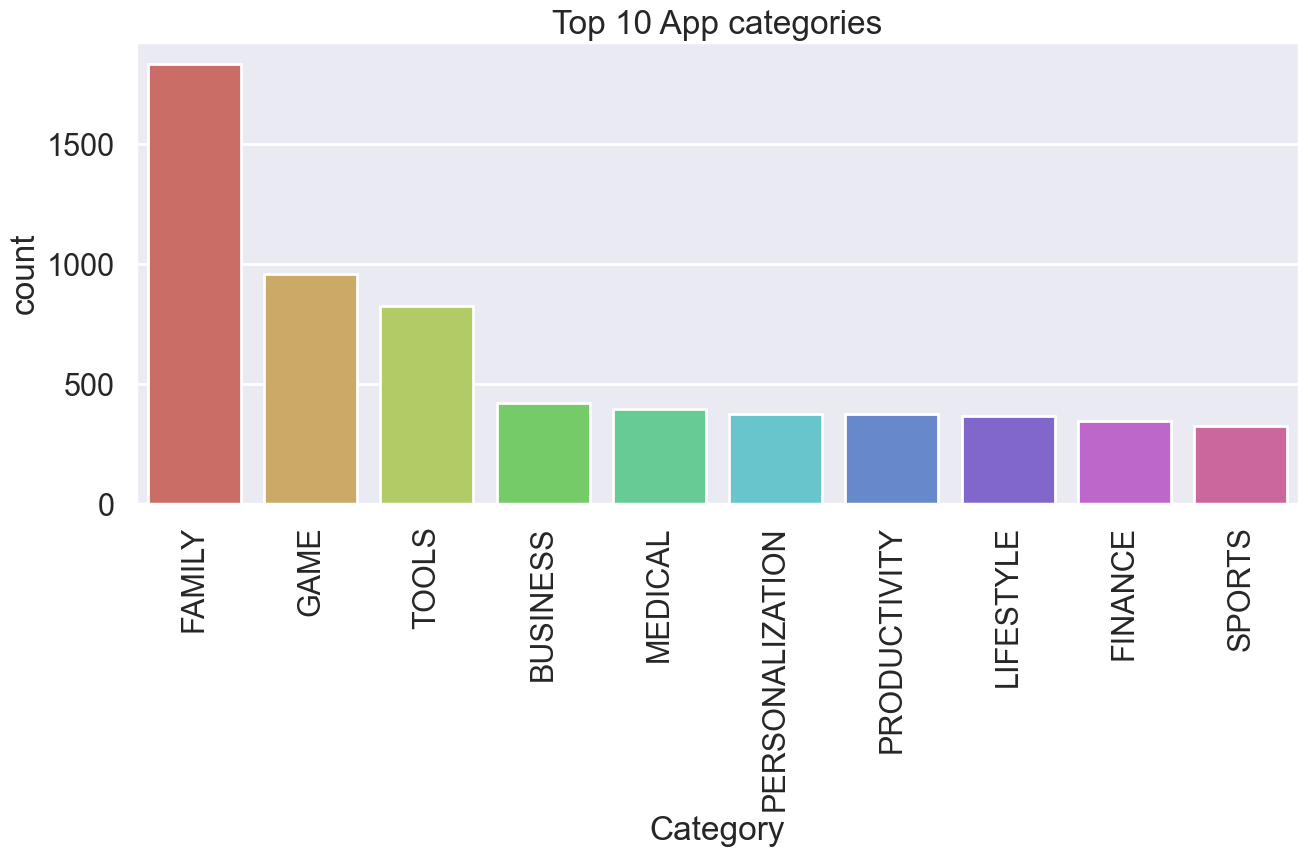

In [292]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

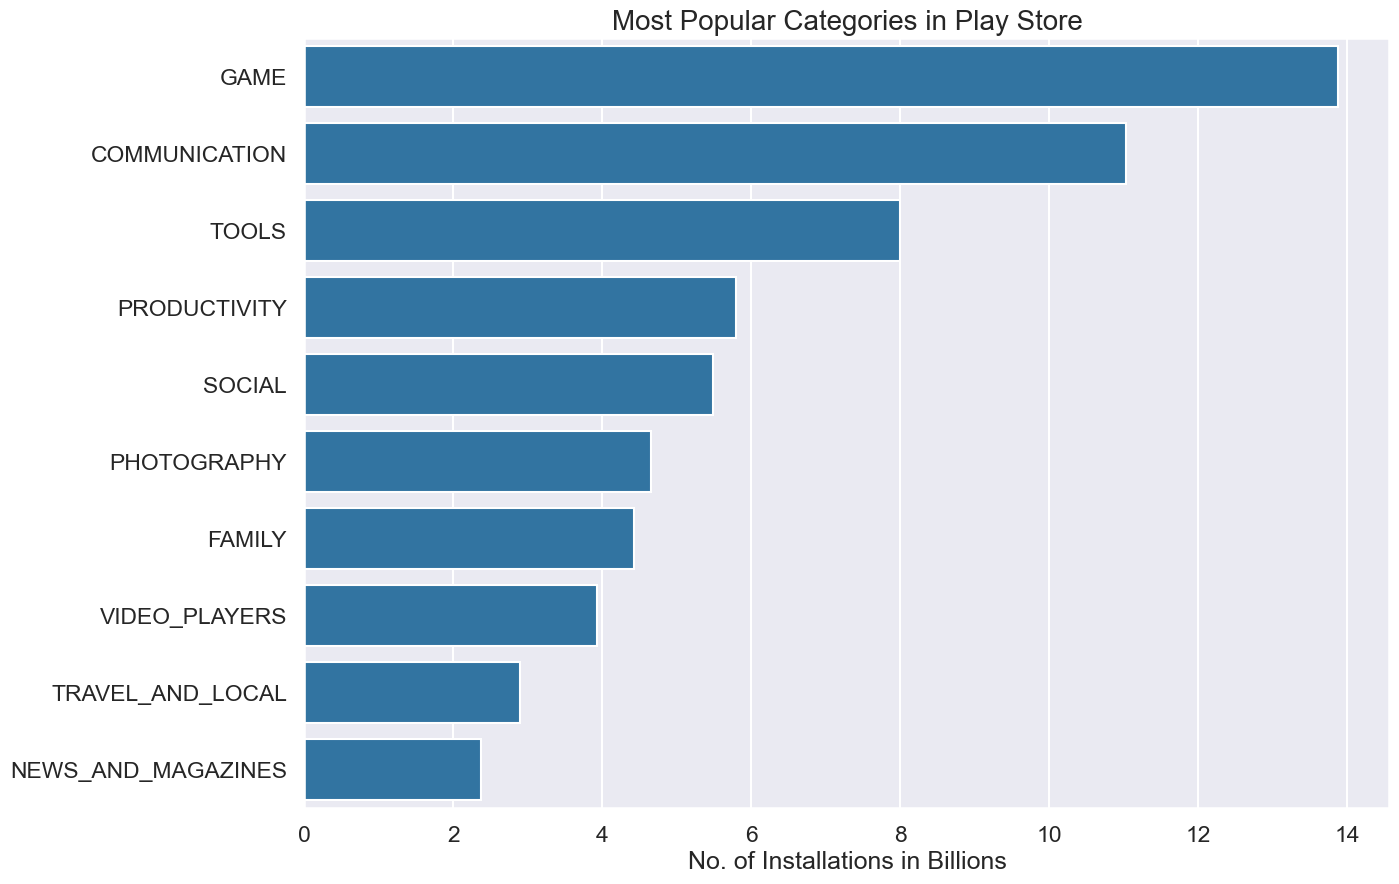

In [293]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

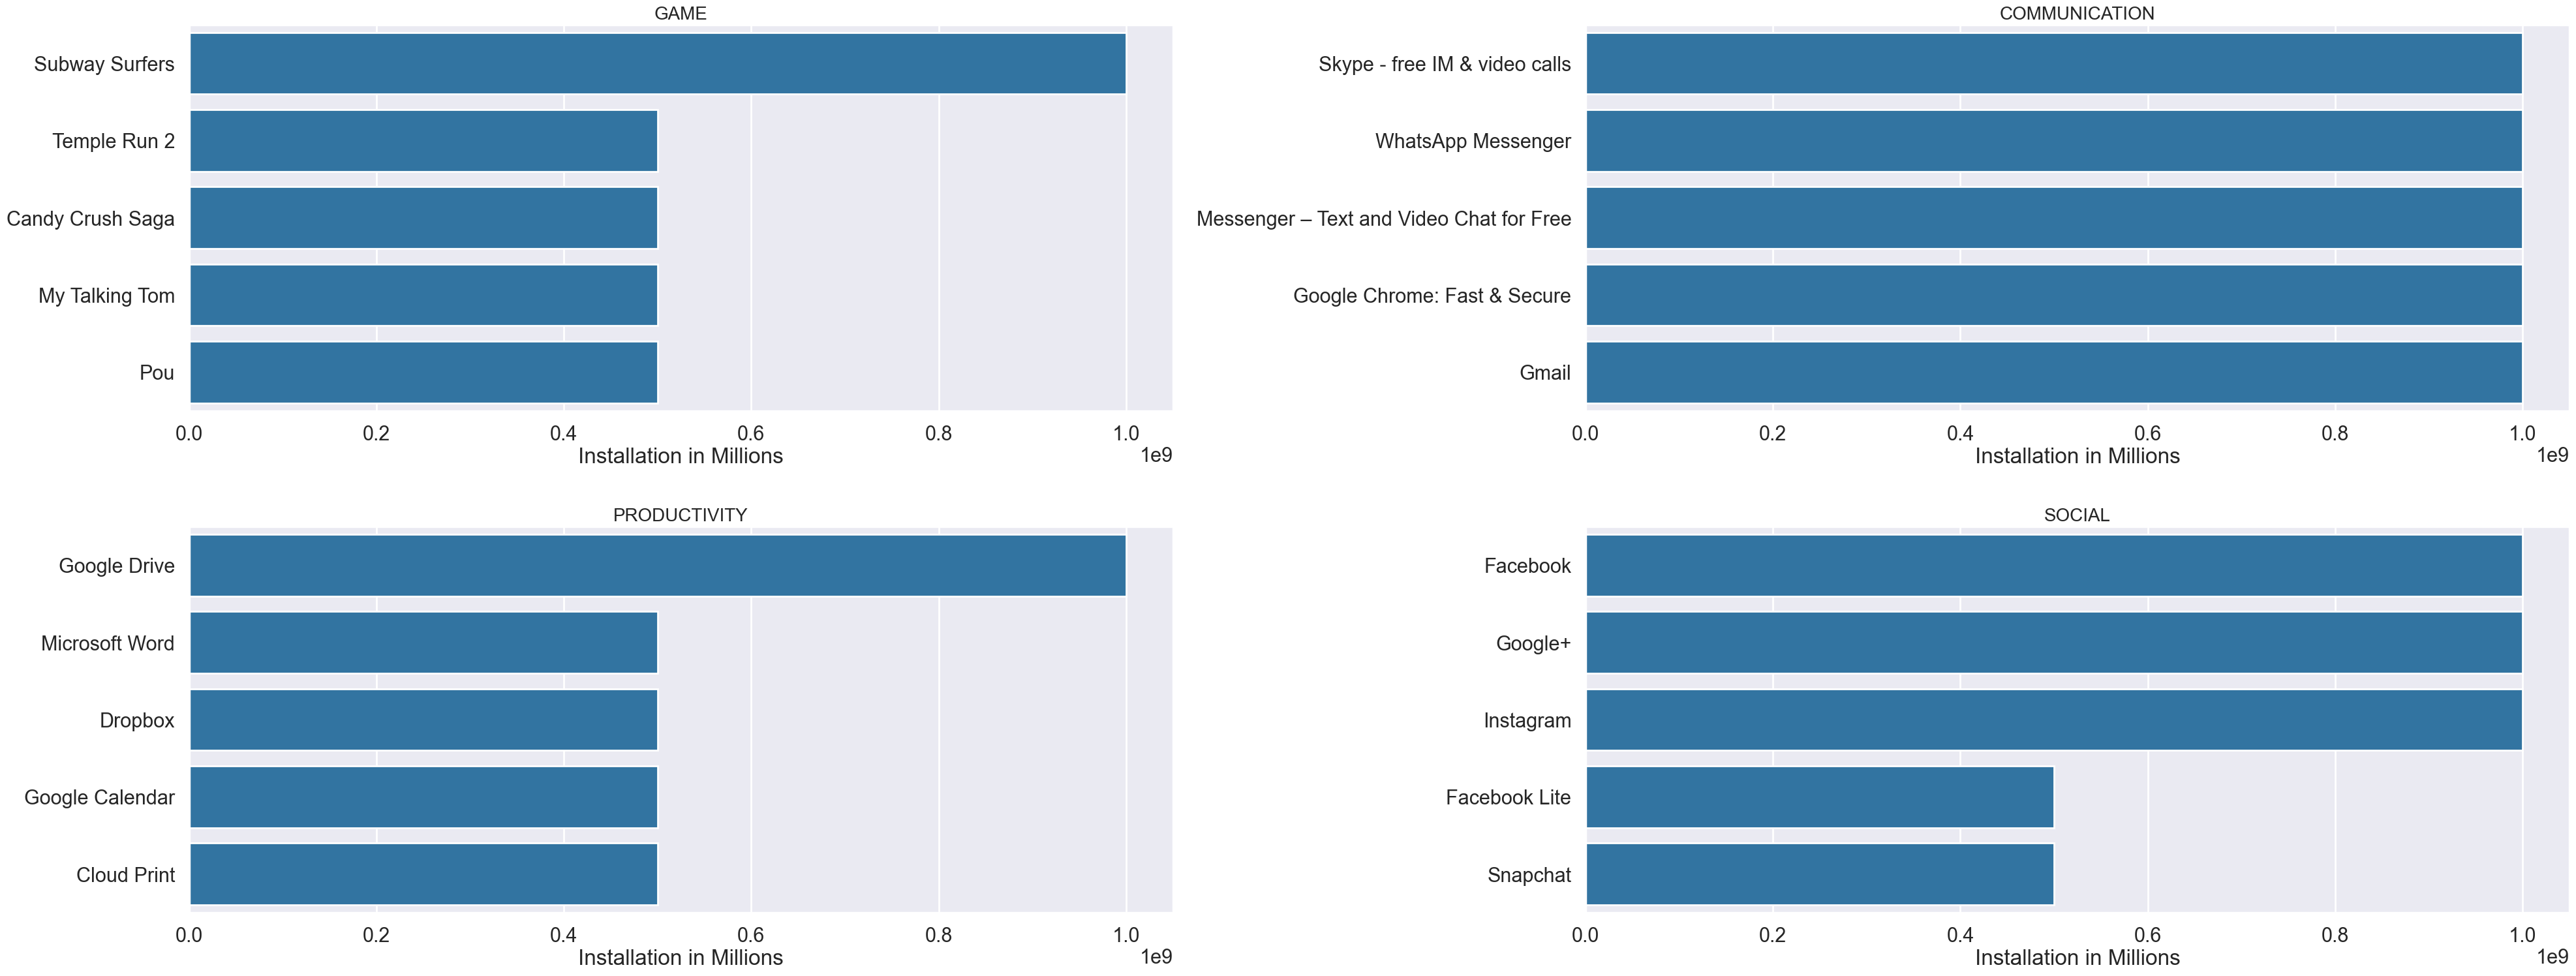

In [294]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [295]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [296]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
